In [403]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.datasets import load_diabetes
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from yellowbrick.features import JointPlotVisualizer

import fun_functions as fun
sns.set_theme()

In [317]:
banking = pd.read_csv('SRC/banking.csv')

In [318]:
'''fico= np.array(banking['fico_range'])

fico_range = []
for x in fico:
    fico_range.append(x.split('-'))

fico_range = pd.DataFrame(fico_range)'''

"fico= np.array(banking['fico_range'])\n\nfico_range = []\nfor x in fico:\n    fico_range.append(x.split('-'))\n\nfico_range = pd.DataFrame(fico_range)"

In [319]:
'''fico_range = []
for x in fico:
    fico_range.append(x.split('-'))

fico_range = pd.DataFrame(fico_range)'''

"fico_range = []\nfor x in fico:\n    fico_range.append(x.split('-'))\n\nfico_range = pd.DataFrame(fico_range)"

In [320]:
#fico_range.iloc[:, 0]

In [321]:
#banking["fico_lower"] = fico_range.iloc[:, 0]
#banking["fico_upper"] = fico_range.iloc[:, 1]

In [322]:
banking['fico_average'] = banking['fico_range'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)
banking.drop('fico_range', axis=1, inplace=True)

banking.head()

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_average
0,8.90,20000.0,20000.0,36.0,737.0
1,12.12,19200.0,19200.0,36.0,717.0
2,21.98,35000.0,35000.0,60.0,692.0
3,9.99,10000.0,9975.0,36.0,697.0
4,11.71,12000.0,12000.0,36.0,697.0


In [323]:
banking['loan_length'] = pd.get_dummies(banking['loan_length'], drop_first=True).astype(int)

In [324]:
banking.describe()
banking.amount_funded_by_investors.value_counts().sort_index()
amount_funded_by_investors = []
for x in banking.amount_funded_by_investors:
    if x < 0:
        amount_funded_by_investors.append(0)
    else:
        amount_funded_by_investors.append(x)

In [325]:
banking['amount_funded_by_investors'] = amount_funded_by_investors

In [335]:
banking

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_average
0,8.90,20000.0,20000.00,0,737.0
1,12.12,19200.0,19200.00,0,717.0
2,21.98,35000.0,35000.00,1,692.0
3,9.99,10000.0,9975.00,0,697.0
4,11.71,12000.0,12000.00,0,697.0
...,...,...,...,...,...
2493,16.77,30000.0,29950.00,1,707.0
2494,14.09,16000.0,16000.00,1,742.0
2495,13.99,10000.0,10000.00,0,682.0
2496,12.42,6000.0,6000.00,0,677.0


In [336]:
banking.describe()
banking.amount_funded_by_investors.value_counts().sort_index()

amount_funded_by_investors
0.00         6
200.00       1
214.02       1
224.99       1
275.00       1
            ..
34900.00     1
34950.00     6
34975.00     5
34977.35     1
35000.00    31
Name: count, Length: 707, dtype: int64

In [327]:
#banking = banking.drop(columns='amount_requested')

In [337]:
banking

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_average
0,8.90,20000.0,20000.00,0,737.0
1,12.12,19200.0,19200.00,0,717.0
2,21.98,35000.0,35000.00,1,692.0
3,9.99,10000.0,9975.00,0,697.0
4,11.71,12000.0,12000.00,0,697.0
...,...,...,...,...,...
2493,16.77,30000.0,29950.00,1,707.0
2494,14.09,16000.0,16000.00,1,742.0
2495,13.99,10000.0,10000.00,0,682.0
2496,12.42,6000.0,6000.00,0,677.0


In [329]:
df = banking.groupby(['interest_rate', 'loan_length']).agg(({'amount_funded_by_investors': 'count', 'fico_average': 'count'}))

In [338]:
df1 = banking.groupby(['interest_rate', 'loan_length']).agg(({'amount_funded_by_investors': 'mean', 'fico_average': 'mean', 'amount_requested': 'mean'}))

In [339]:
df = df.reset_index()
df1 = df1.reset_index()

In [340]:
loan = []
for x in df1.loan_length:
    if x == 0:
        loan.append('36 Months')
    else:
        loan.append('60 Months')

df1['loan_length'] = loan

In [341]:
df1

,interest_rate,loan_length,amount_funded_by_investors,fico_average,amount_requested
0,5.42,36 Months,7204.545455,784.727273,7206.818182
1,5.79,36 Months,5708.140000,753.923077,6025.000000
2,5.79,60 Months,11862.380000,782.000000,12000.000000
3,5.99,36 Months,5717.500000,767.000000,5722.500000
4,6.00,60 Months,6400.000000,697.000000,6400.000000
...,...,...,...,...,...
369,24.20,60 Months,24000.000000,667.000000,24000.000000
370,24.33,60 Months,30000.000000,672.000000,30000.000000
371,24.70,60 Months,28000.000000,669.500000,28000.000000
372,24.89,36 Months,23950.000000,662.000000,24000.000000


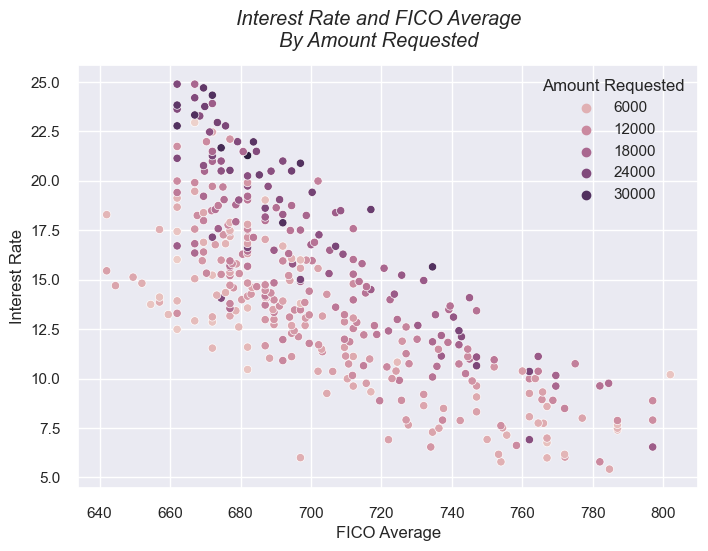

In [344]:
sns.scatterplot(data=df1, y='interest_rate', x='fico_average', hue='amount_requested')
plt.suptitle('Interest Rate and FICO Average\nBy Amount Requested', fontstyle='italic')
plt.legend(title= 'Amount Requested')
plt.xlabel('FICO Average')
plt.ylabel('Interest Rate');

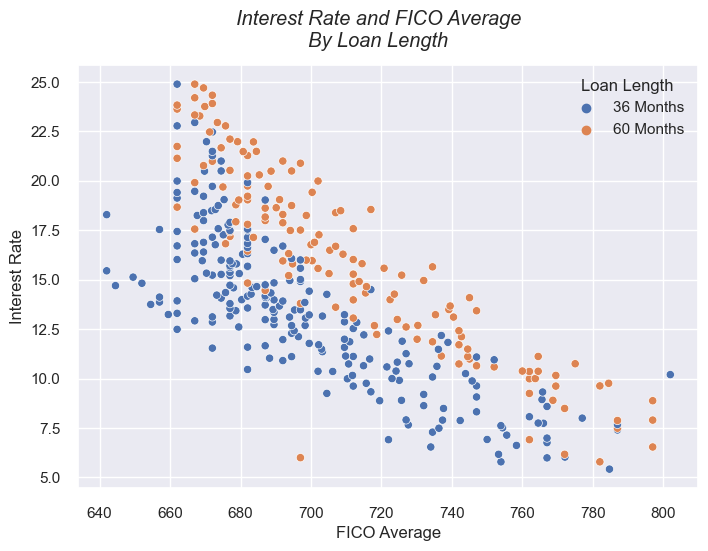

In [311]:
fig, ax = plt.subplots()
sns.scatterplot(data=df1, y='interest_rate', x='fico_average', hue='loan_length')
plt.suptitle('Interest Rate and FICO Average\nBy Loan Length', fontstyle='italic')
plt.legend(title= 'Loan Length')
plt.xlabel('FICO Average')
plt.ylabel('Interest Rate')

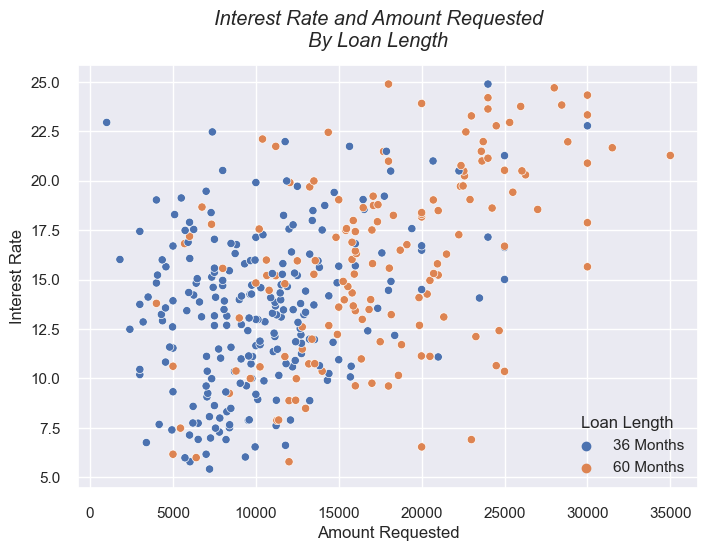

In [345]:
sns.scatterplot(data=df1, y='interest_rate', x='amount_requested', hue='loan_length')
plt.suptitle('Interest Rate and Amount Requested\nBy Loan Length', fontstyle='italic')
plt.legend(title= 'Loan Length')
plt.xlabel('Amount Requested')
plt.ylabel('Interest Rate');

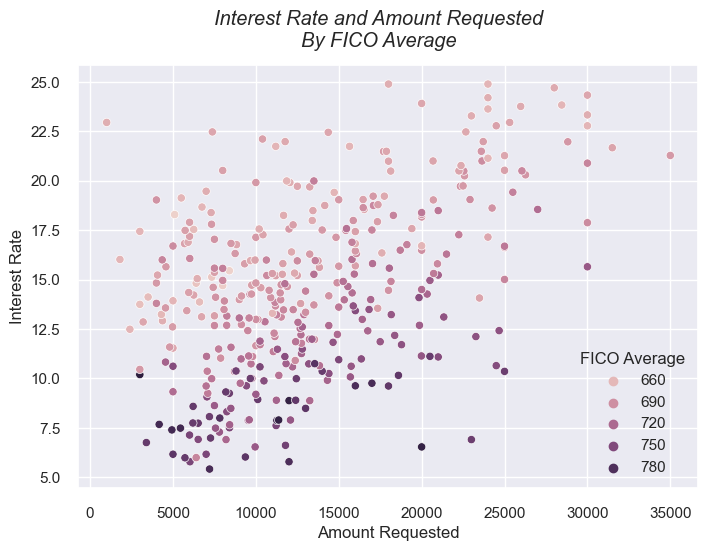

In [347]:
sns.scatterplot(data=df1, y='interest_rate', x='amount_requested', hue='fico_average')
plt.suptitle('Interest Rate and Amount Requested\nBy FICO Average', fontstyle='italic')
plt.legend(title= 'FICO Average')
plt.xlabel('Amount Requested')
plt.ylabel('Interest Rate');

In [270]:
df

,interest_rate,loan_length,amount_funded_by_investors,fico_average
0,5.42,0,11,11
1,5.79,0,13,13
2,5.79,1,1,1
3,5.99,0,10,10
4,6.00,1,1,1
...,...,...,...,...
369,24.20,1,1,1
370,24.33,1,1,1
371,24.70,1,2,2
372,24.89,0,1,1


In [269]:
df.sort_values(by='fico_average', ascending=False)

,interest_rate,loan_length,amount_funded_by_investors,fico_average
29,7.90,0,115,115
116,12.12,0,115,115
143,13.11,0,102,102
222,15.31,0,68,68
178,14.09,0,67,67
...,...,...,...,...
269,17.04,0,1,1
266,16.83,0,1,1
264,16.82,0,1,1
261,16.71,0,1,1


In [246]:
df = banking.groupby(['interest_rate', 'loan_length', 'amount_funded_by_investors', 'fico_average']).value_counts()

In [247]:
pd.DataFrame(df)

count
interest_rate loan_length amount_funded_by_investors fico_average       
5.42          0           4075.0                     772.0             1
                          4600.0                     777.0             1
                          4775.0                     787.0             1
                          4800.0                     792.0             1
                          5000.0                     752.0             1
...                                                                  ...
24.33         1           30000.0                    672.0             1
24.70         1           21000.0                    677.0             1
                          35000.0                    662.0             1
24.89         0           23950.0                    662.0             1
              1           18000.0                    667.0             1

[2365 rows x 1 columns]

In [237]:
sns.scatterplot()


AttributeError: 'MultiIndex' object has no attribute '_data'

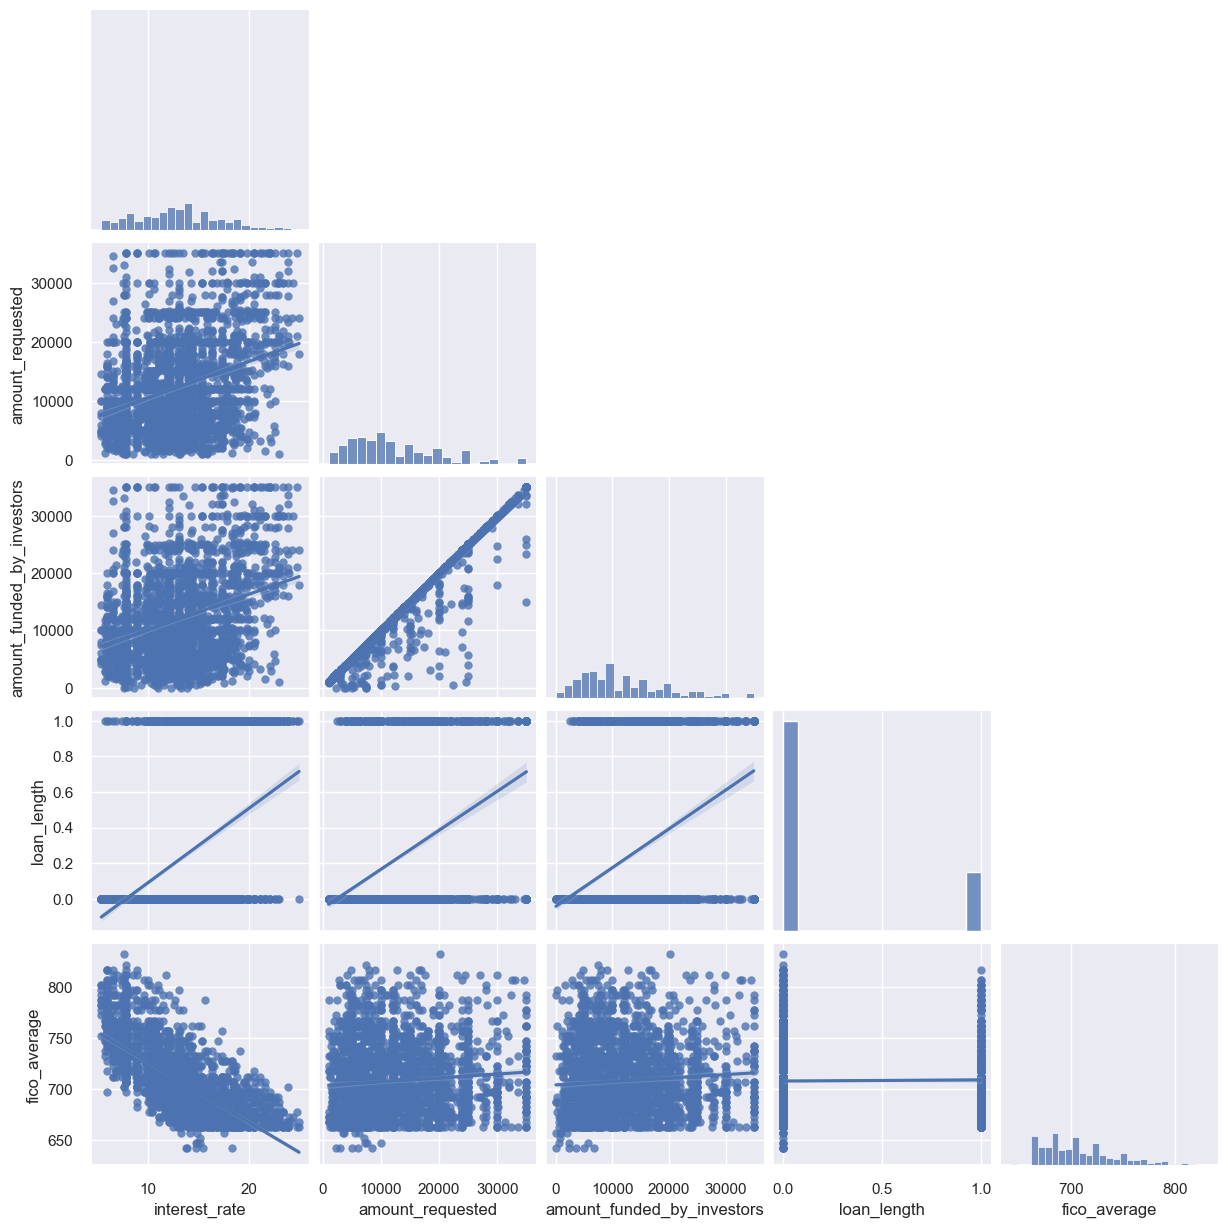

In [348]:
sns.pairplot(banking,kind='reg', corner=True)

In [349]:
banking.corr()

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_average
interest_rate,1.000000,0.331831,0.336830,0.423506,-0.709216
amount_requested,0.331831,1.000000,0.969841,0.412298,0.083378
amount_funded_by_investors,0.336830,0.969841,1.000000,0.406218,0.074284
loan_length,0.423506,0.412298,0.406218,1.000000,0.012703
fico_average,-0.709216,0.083378,0.074284,0.012703,1.000000


<Axes: >

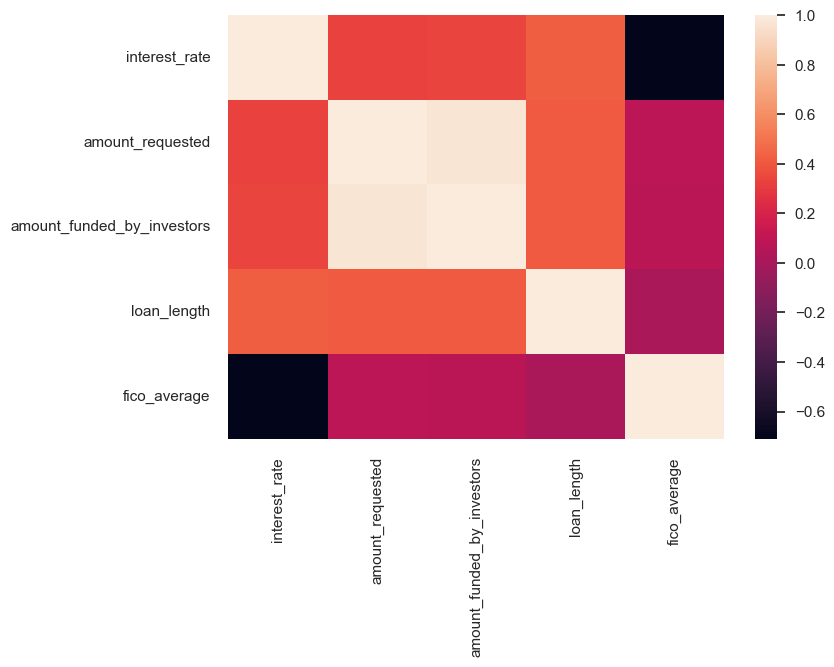

In [352]:
sns.heatmap(banking.corr())


banking.corr()

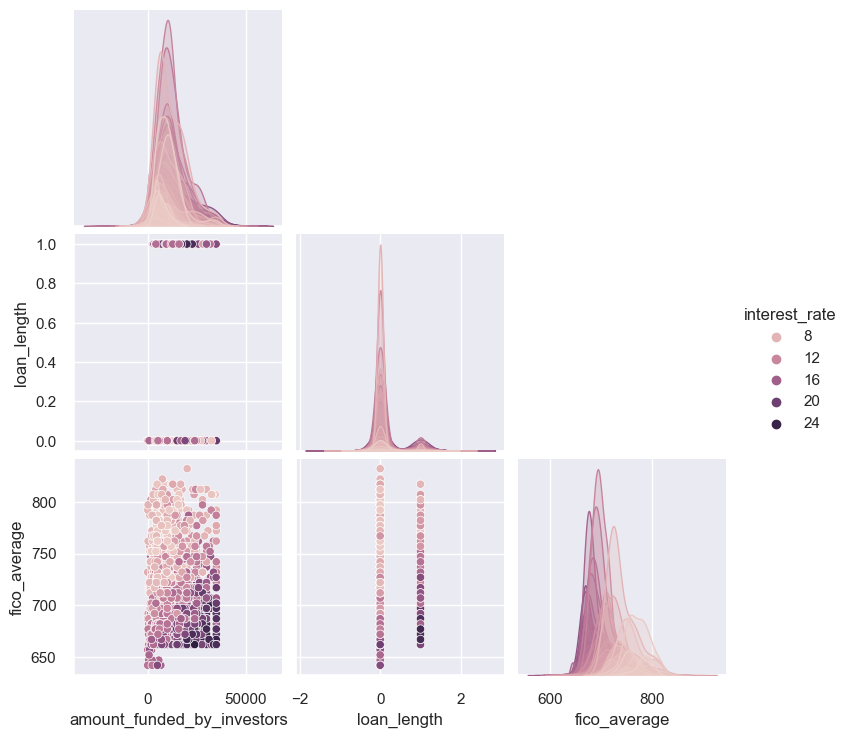

In [171]:
sns.pairplot(banking, hue='interest_rate', corner=True)

In [56]:
scaled = StandardScaler().fit_transform(banking)

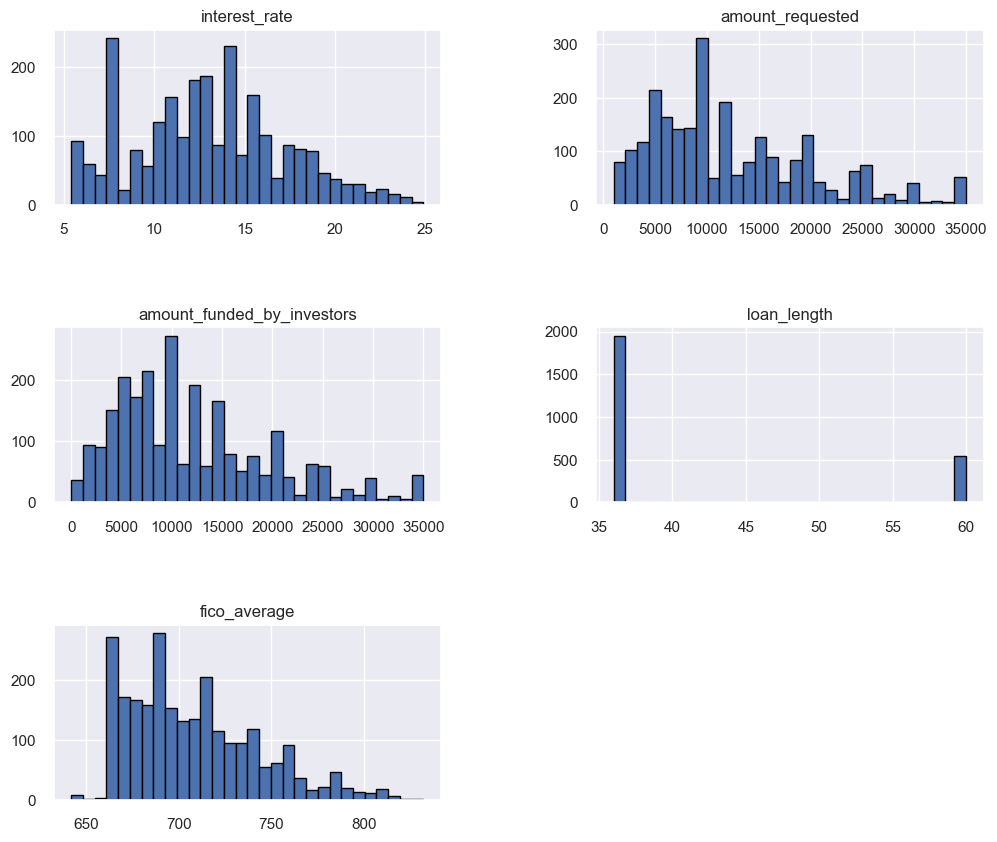

In [57]:
banking.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

<Axes: xlabel='interest_rate', ylabel='fico_average'>

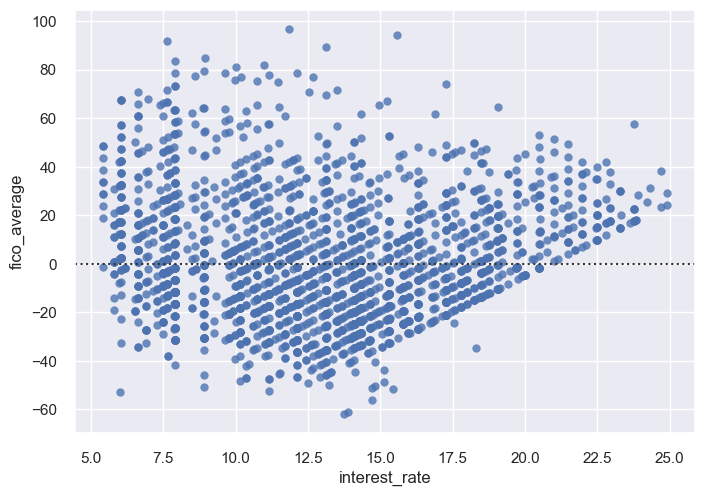

In [172]:
sns.residplot(data=banking, x='interest_rate', y='fico_average')

<Axes: xlabel='interest_rate', ylabel='amount_funded_by_investors'>

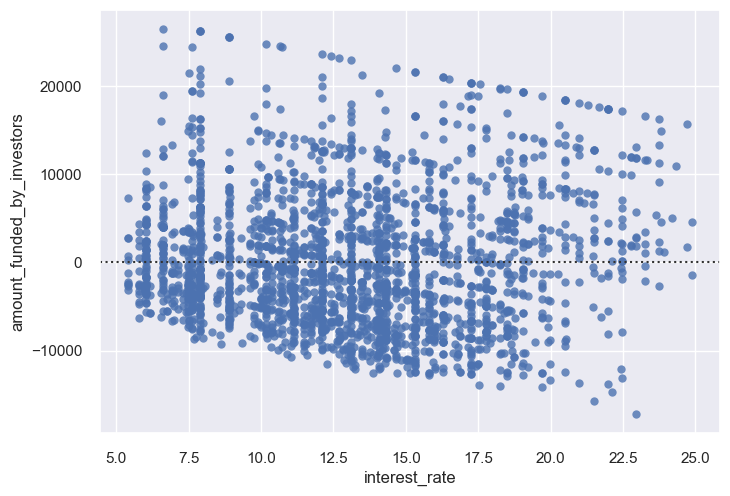

In [173]:
sns.residplot(data=banking, x='interest_rate', y='amount_funded_by_investors')

In [397]:
X = banking[['amount_funded_by_investors','loan_length','fico_average']]
y = banking['interest_rate']

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [199]:
funded_train = np.asarray(X_train['amount_funded_by_investors'])
fico_train = np.asarray(X_train['fico_average'])
loan_ln_train = np.asarray(X_test['loan_length'])
funded_test = np.asarray(X_test['amount_funded_by_investors'])
fico_test = np.asarray(X_test['fico_average'])
loan_ln_test = np.asarray(X_test['loan_length'])

In [180]:
Linear_regression = make_pipeline(StandardScaler(), LinearRegression())
lasso_cv = make_pipeline(StandardScaler(), LassoCV())
ridge_cv = make_pipeline(StandardScaler(), RidgeCV())

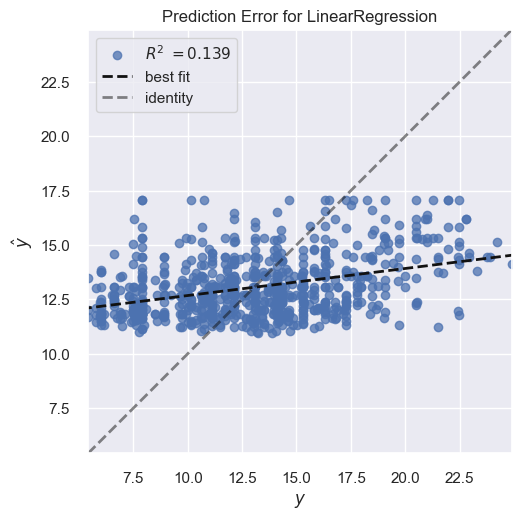

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [181]:
model1 = Linear_regression
visualizer = PredictionError(model1)
visualizer.fit(funded_train.reshape(-1, 1), y_train)  
visualizer.score(funded_test.reshape(-1, 1), y_test)  
visualizer.poof()

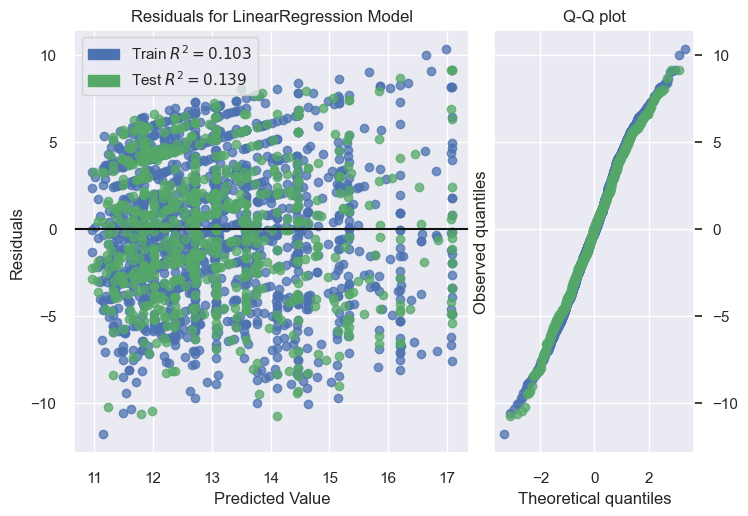

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [193]:
visualizer = ResidualsPlot(LinearRegression(), hist=False, qqplot=True)
visualizer.fit(funded_train.reshape(-1, 1), y_train)  
visualizer.score(funded_test.reshape(-1, 1), y_test) 
visualizer.poof()

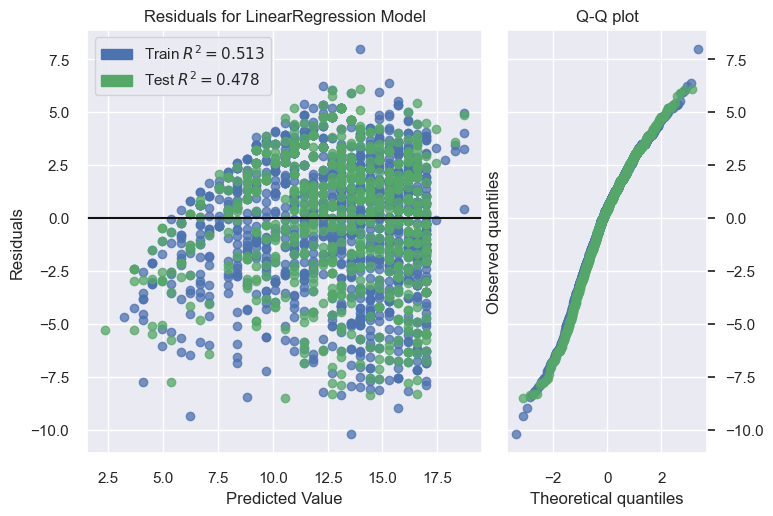

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [194]:
visualizer = ResidualsPlot(LinearRegression(), hist=False, qqplot=True)
visualizer.fit(fico_train.reshape(-1, 1), y_train)  
visualizer.score(fico_test.reshape(-1, 1), y_test) 
visualizer.poof()

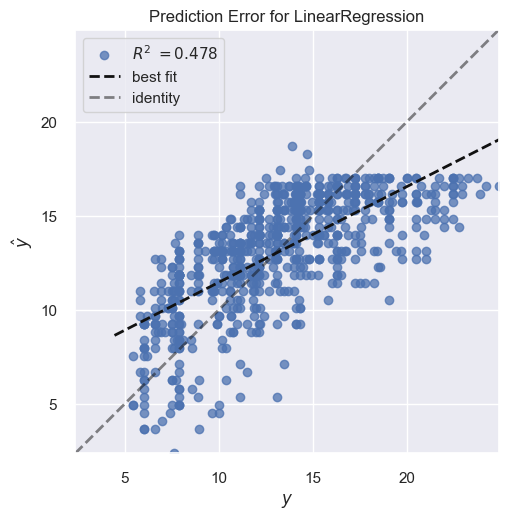

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [195]:
model1 = LinearRegression()
visualizer = PredictionError(model1)
visualizer.fit(fico_train.reshape(-1, 1), y_train)  
visualizer.score(fico_test.reshape(-1, 1), y_test) 
visualizer.poof()

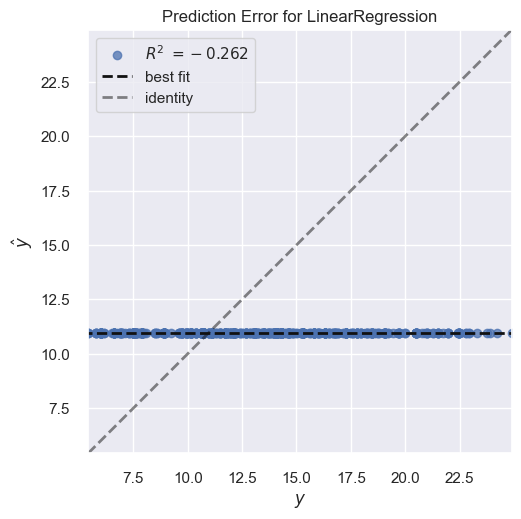

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [201]:
model1 = LinearRegression()
visualizer = PredictionError(Linear_regression)
visualizer.fit(loan_ln_train.reshape(-1, 1), y_train)  
visualizer.score(loan_ln_test.reshape(-1, 1), y_test) 
visualizer.poof()

In [392]:
def lasso_model(X, y):# Lasso with 5 fold cross-validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=40)
    #model = LassoCV(cv=10, random_state=40, max_iter=10000)
    model = make_pipeline(StandardScaler(), LassoCV(cv=10, random_state=40, max_iter=10000))
    # Fit model
    model.fit(X_train, y_train)

    model[1].alpha_

    lasso_best = Lasso(alpha=model[1].alpha_)
    lasso_best.fit(X_train, y_train)
    print('Best coeficient - X value:', list(zip(lasso_best.coef_, X)))
    print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
    print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))
    print('MSE:', mean_squared_error(y_test, lasso_best.predict(X_test)))
    return model, lasso_best

In [398]:
X

,amount_funded_by_investors,loan_length,fico_average
0,20000.00,0,737.0
1,19200.00,0,717.0
2,35000.00,1,692.0
3,9975.00,0,697.0
4,12000.00,0,697.0
...,...,...,...
2493,29950.00,1,707.0
2494,16000.00,1,742.0
2495,10000.00,0,682.0
2496,6000.00,0,677.0


In [399]:
X = np.asarray(X['fico_average'])

In [400]:
X

array([737., 717., 692., ..., 682., 677., 672.])

In [404]:
model, lasso_best = fun.lasso_model(X.reshape(-1, 1), y)

Best coeficient - X value: [(-0.0841144979045151, array([737.]))]
R squared training set 50.57
R squared test set 49.56
MSE: 8.940045930249175


In [386]:
def ridge_model(X, y):# Lasso with 5 fold cross-validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=40)
    model1 = RidgeCV(cv=10)

    # Fit model
    model1.fit(X_train, y_train)

    model1.alpha_

    ridge_best = Ridge(alpha=model1.alpha_)
    ridge_best.fit(X_train, y_train)
    print('Best coeficient - X value:', list(zip(ridge_best.coef_, X)))

    print('R squared training set', round(ridge_best.score(X_train, y_train)*100, 2))
    print('R squared test set', round(ridge_best.score(X_test, y_test)*100, 2))
    print(mean_squared_error(y_test, ridge_best.predict(X_test)))
    return model1, ridge_best

In [387]:
model1, ridge_best = ridge_model(X.reshape(-1, 1), y)

Best coeficient - X value: [(-0.08411705703540952, array([737.]))]
R squared training set 50.57
R squared test set 49.56
8.940034070466703


In [365]:
def mse_on_fold_plot(model, ymin, ymax):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.semilogx(model.alphas_, model.mse_path_, ":")
    
    ax1.plot(
        model.alphas_ ,

        model.mse_path_.mean(axis=-1),
        "k",
        label="Average across the folds",
        linewidth=2,
    )
    ax1.axvline(
        model.alpha_, linestyle="--", color="k", label=f"Optimal alpha: CV estimate ({model.alpha_:.4f})"
    )

    ax1.legend()
    ax1.set_xlabel("alphas")
    ax1.set_ylabel("Mean square error")
    ax1.set_title("Mean square error on each fold:\nBanking Features")
    ax1.axis("tight")

    ymin, ymax = 0, 20
    ax1.set_ylim(ymin, ymax);

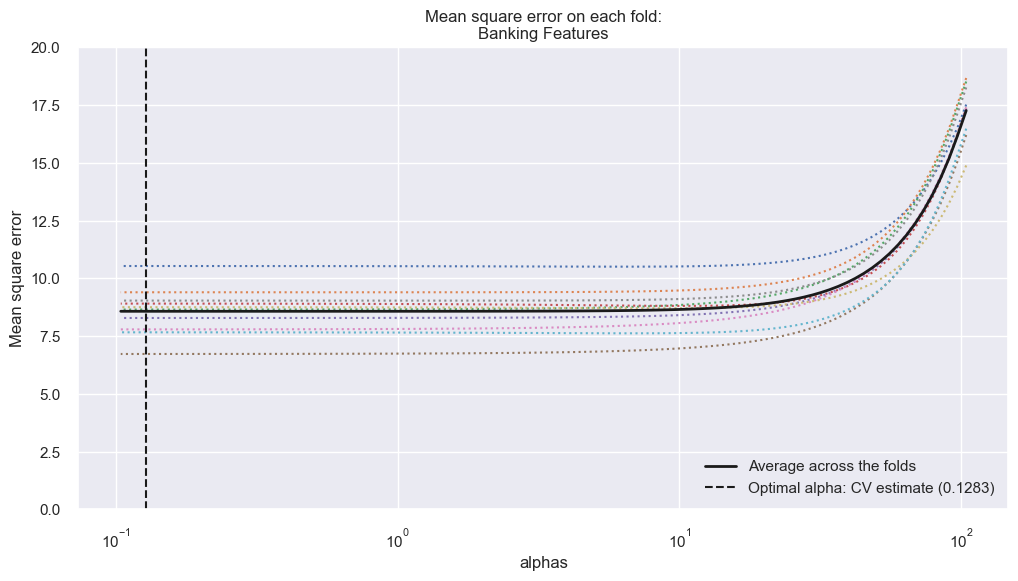

In [367]:
mse_on_fold_plot(model, -50, 20)

In [377]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)

def coeficients_plot(alphas, X, y, model):
    coefs = []
    for a in alphas:
        model.set_params(alpha=a)
        model.fit(X, y)
        coefs.append(model.coef_)
    
    ax = plt.gca()
    
    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    plt.axis('tight')
    plt.xlabel('alpha')
    plt.ylabel('Standardized Coefficients')
    plt.title('Lasso coefficients as a function of alpha')

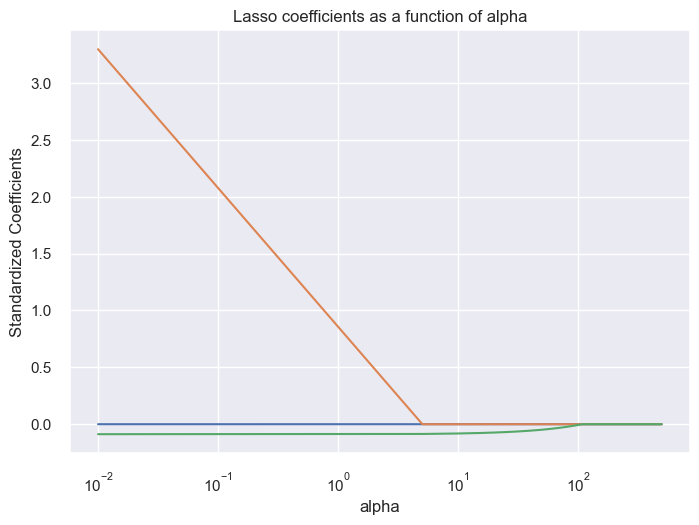

In [378]:
coeficients_plot(alphas, X_train, y_train, lasso)

MSE training set 4.43
MSE test set 4.42


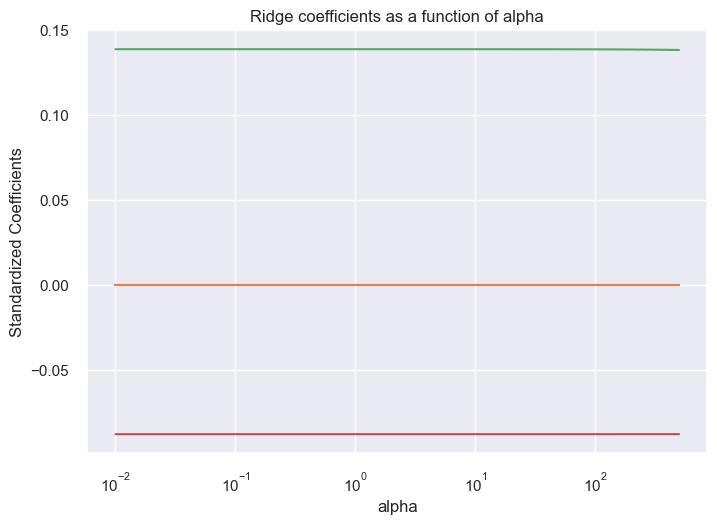

In [149]:
reg = RidgeCV(cv=100)
reg.fit(X_train, y_train)
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

alphas = np.linspace(0.01,500,100)
ridge = Ridge(max_iter=10000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)

ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients as a function of alpha');

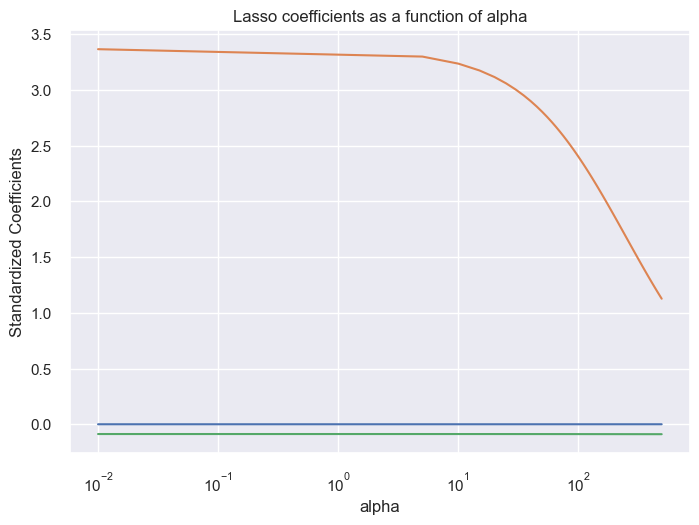

In [380]:
coeficients_plot(alphas, X_train, y_train, ridge)

In [138]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

In [203]:
banking.head()

,interest_rate,amount_funded_by_investors,loan_length,fico_average
0,8.90,20000.0,0,737.0
1,12.12,19200.0,0,717.0
2,21.98,35000.0,1,692.0
3,9.99,9975.0,0,697.0
4,11.71,12000.0,0,697.0


In [ ]:
population_mean = banking.groupby('').mean().iloc[1, 1] # caculates the mean of population
population_std = cars_mpg_weight.groupby('MPG_groups').std(ddof=1).iloc[1, 1] # caculates standard deviation
# Define the parameters for the alternate hypothesis
#population_mean2 = cars_mpg_weight.groupby('MPG_groups').mean().iloc[0, 1]
#population_std2 = cars_mpg_weight.groupby('MPG_groups').std(ddof=1).iloc[0, 1]

population_mean2 = population_mean + 10
population_std2 = population_std

sample_size = 1000  # Size of the sample
standard_error = population_std / np.sqrt(sample_size)  # Standard error
standard_error2 = population_std2 / np.sqrt(sample_size)

# creates random variable
sampling_distribution_null = stats.norm(population_mean, 
                                        population_std / np.sqrt(sample_size))

sampling_distribution_alt = stats.norm(population_mean2, 
                                        population_std2 / np.sqrt(sample_size))
# rv_alt = norm(loc=sample_mean_alt, scale=standard_error_alt)

x = np.linspace(population_mean - 4 * (population_std / np.sqrt(sample_size)), 
                population_mean + 4 * population_std / np.sqrt(sample_size), 100)

x1 = np.linspace(population_mean2 - 4 * (population_std2 / np.sqrt(sample_size)), 
                population_mean2 + 4 * population_std2 / np.sqrt(sample_size), 100)

percentile_95 = sampling_distribution_null.ppf(0.975)
percentile_5 = sampling_distribution_null.ppf(0.025)
sns.set_theme()
plt.plot(x, sampling_distribution_null.pdf(x))
plt.plot(x1, sampling_distribution_alt.pdf(x1))
plt.axvline(percentile_95, linestyle="--")
plt.axvline(percentile_5, linestyle="--")

# This code shades the area that is between the 95th percentile
plt.fill_between(x, sampling_distribution_null.pdf(x), where=(x >= percentile_95) | (x <= percentile_5) , color='gray', alpha=0.5, label="95th Percentile") 
plt.xlabel('Sample Mean of MPG')
plt.ylabel('Probability Density')
plt.title('Sampling Distribution of the Mean MPG')
plt.legend()
plt.show()